In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from brian2 import * 

eqs = '''
dv/dt = (ge+gi-(v+49*mV))/(20*ms) : volt 
dge/dt = -ge/(5*ms) : volt 
dgi/dt = -gi/(10*ms) : volt ''' 

P = NeuronGroup(4000, eqs, threshold='v>-50*mV', reset='v=-60*mV')
P.v = -60*mV
Pe = P[:3200]
Pi = P[3200:]

Ce = Synapses(Pe, P, on_pre='ge+=1.62*mV')
Ce.connect(p=0.02)

Ci = Synapses(Pi, P, on_pre='gi-=9*mV')
Ci.connect(p=0.02)

M = SpikeMonitor(P)

run(1*second)

INFO       No numerical integration method specified for group 'neurongroup', using method 'exact' (took 0.60s). [brian2.stateupdaters.base.method_choice]


<IPython.core.display.Javascript object>


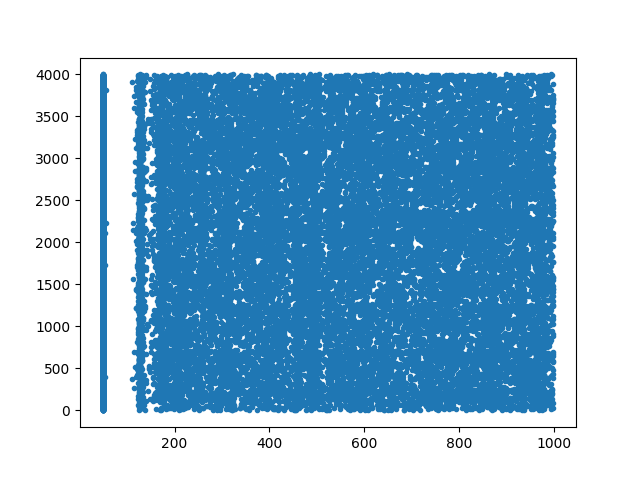

In [3]:
plot(M.t/ms, M.i, '.')
show()